In [1]:
import pandas as pd

import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale





**Load The Data**

In [2]:
df = pd.read_csv('housing_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00,-2000
1,1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00,-10000
2,2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,...,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00,-95000
3,3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00,-5000
4,4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,...,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25,5100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Zip_Code            3117 non-null   int64  
 2   Dwelling_Type       3117 non-null   object 
 3   Nr_Bedrooms         3117 non-null   int64  
 4   Nr_Bathrooms        3117 non-null   float64
 5   Approx_SQFT         3117 non-null   int64  
 6   Price_per_SqFt      3117 non-null   float64
 7   Dwelling_Styles     3117 non-null   object 
 8   Year_Built          3117 non-null   int64  
 9   Approx_Lot_SqFt     3117 non-null   int64  
 10  Pool                3117 non-null   object 
 11  HOA_Fee             2200 non-null   float64
 12  Land_Lease_Fee      3117 non-null   object 
 13  Clubhouse_Rec_Room  3117 non-null   object 
 14  Basement            3117 non-null   object 
 15  RV_Gate             3117 non-null   object 
 16  List_P

In [5]:
df['Zip_Code'] = df['Zip_Code'].astype(str)  # zipcodes are categorical values

In [6]:
# Most of real estate sales are SF-Single-Family type followed by TH-Town homes, AF-apartment/flat style, 
# MM-Manufactured/Mobile homes, PH-patio homes, LS-Loft style, GT-Gemini/Twin homes, and MD-Modular/prefab homes.

df['Dwelling_Type'].value_counts()

Dwelling_Type
SF    2308
TH     330
AF     239
MM     177
PH      56
LS       3
GT       3
MD       1
Name: count, dtype: int64

## Exploring the data - visualizing features distributions

In [7]:
agg_functions = {'Sold_Price': ['min','mean','max', 'count']}
df_mean = df.groupby(['Sold_Price','Zip_Code']).agg(agg_functions)
df_mean

Sold_Price                            
                           min        mean       max count
Sold_Price Zip_Code                                       
10000      85120         10000     10000.0     10000     1
14500      85204         14500     14500.0     14500     1
18000      85207         18000     18000.0     18000     1
20000      85207         20000     20000.0     20000     1
21000      85225         21000     21000.0     21000     1
...                        ...         ...       ...   ...
5800000    85018       5800000   5800000.0   5800000     1
6295000    85377       6295000   6295000.0   6295000     1
7626000    85016       7626000   7626000.0   7626000     1
9391112    85253       9391112   9391112.0   9391112     1
10364000   85018      10364000  10364000.0  10364000     1

[2838 rows x 4 columns]

In [8]:
df_zip = df[['Zip_Code','Sold_Price']]
df_zip_sorted = df_zip.sort_values(by='Sold_Price')
df_zip_sorted

,Zip_Code,Sold_Price
1203,85120,10000
1435,85204,14500
1582,85207,18000
1633,85207,20000
1987,85225,21000
...,...,...
219,85018,5800000
2946,85377,6295000
148,85016,7626000
2332,85253,9391112


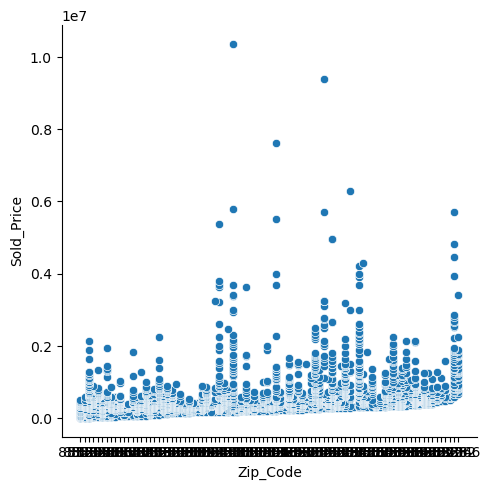

In [9]:
sns.relplot(x=df_zip_sorted['Zip_Code'], y = df_zip_sorted['Sold_Price'], kind = 'scatter')
plt.show()

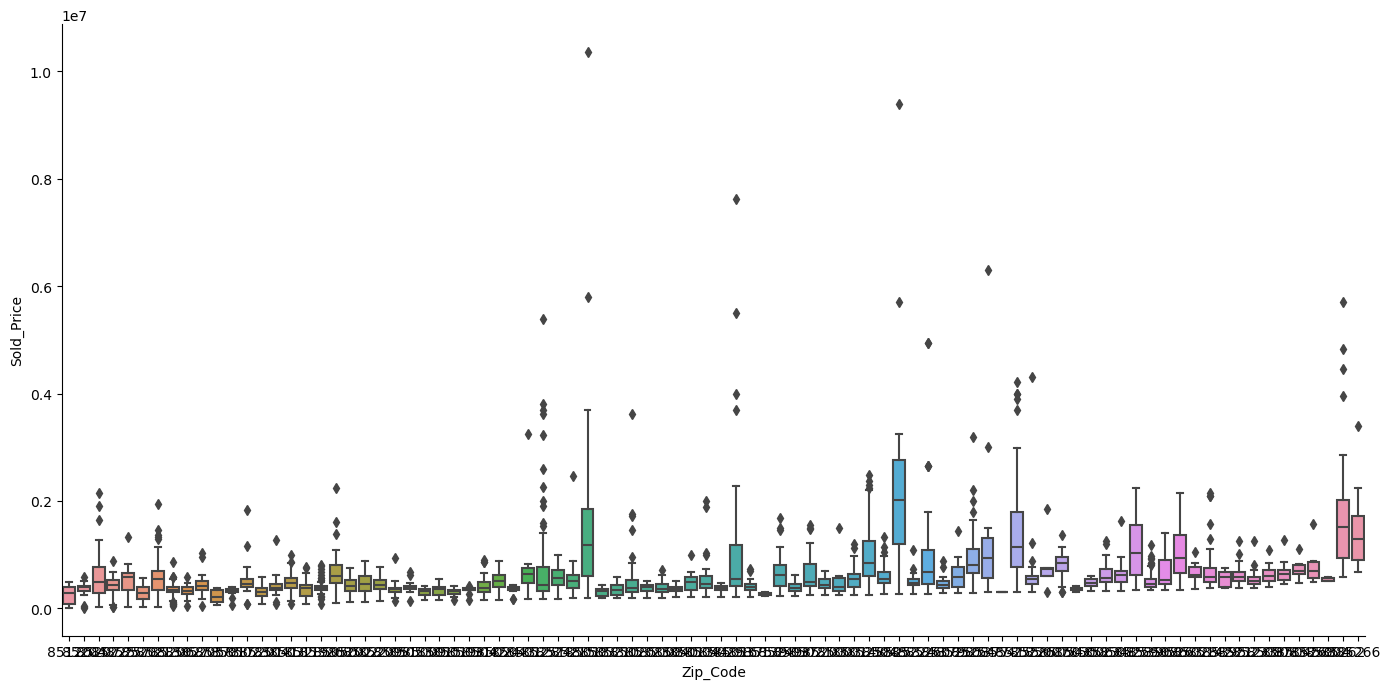

In [10]:
g = sns.catplot(x = 'Zip_Code', y = 'Sold_Price', 
               data = df_zip_sorted,
               kind = 'box', height=7, aspect=2)

plt.show()

In [11]:
df['Zip_Code'].value_counts()

Zip_Code
85326    123
85142     98
85396     92
85207     83
85251     80
        ... 
85004      6
85003      6
85007      5
85139      2
85541      1
Name: count, Length: 88, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Zip_Code            3117 non-null   object 
 2   Dwelling_Type       3117 non-null   object 
 3   Nr_Bedrooms         3117 non-null   int64  
 4   Nr_Bathrooms        3117 non-null   float64
 5   Approx_SQFT         3117 non-null   int64  
 6   Price_per_SqFt      3117 non-null   float64
 7   Dwelling_Styles     3117 non-null   object 
 8   Year_Built          3117 non-null   int64  
 9   Approx_Lot_SqFt     3117 non-null   int64  
 10  Pool                3117 non-null   object 
 11  HOA_Fee             2200 non-null   float64
 12  Land_Lease_Fee      3117 non-null   object 
 13  Clubhouse_Rec_Room  3117 non-null   object 
 14  Basement            3117 non-null   object 
 15  RV_Gate             3117 non-null   object 
 16  List_P

In [13]:
df.head()

,Unnamed: 0,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00,-2000
1,1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00,-10000
2,2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,...,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00,-95000
3,3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00,-5000
4,4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,...,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25,5100


In [14]:
df['Sold_Price'].describe()
    

count    3.117000e+03
mean     6.352639e+05
std      6.138111e+05
min      1.000000e+04
25%      3.600000e+05
50%      4.750000e+05
75%      6.808880e+05
max      1.036400e+07
Name: Sold_Price, dtype: float64

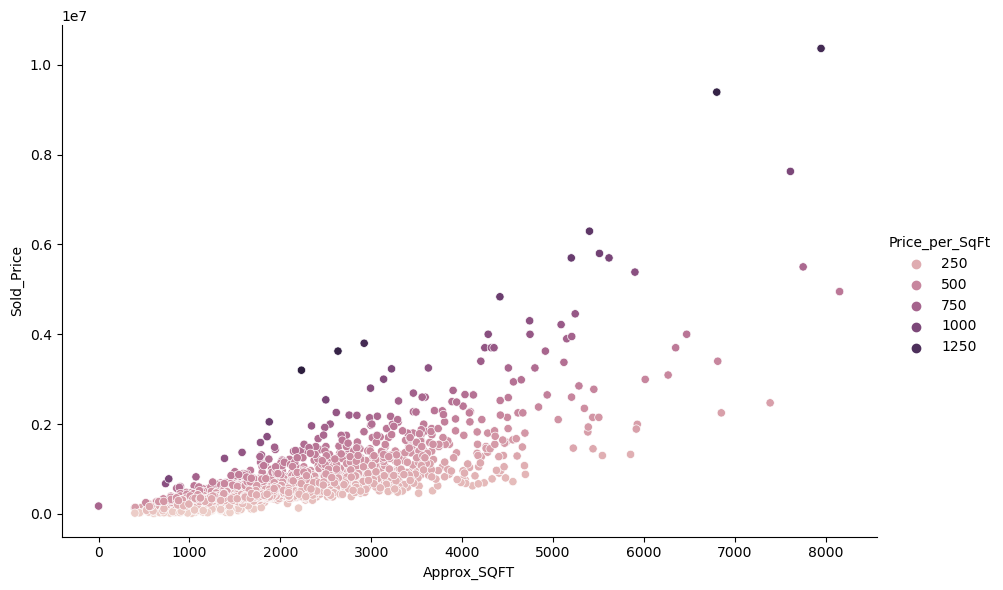

In [15]:
sns.relplot(x='Approx_SQFT', y='Sold_Price', data=df, kind='scatter', hue='Price_per_SqFt', height=6, aspect=1.5)
plt.show()

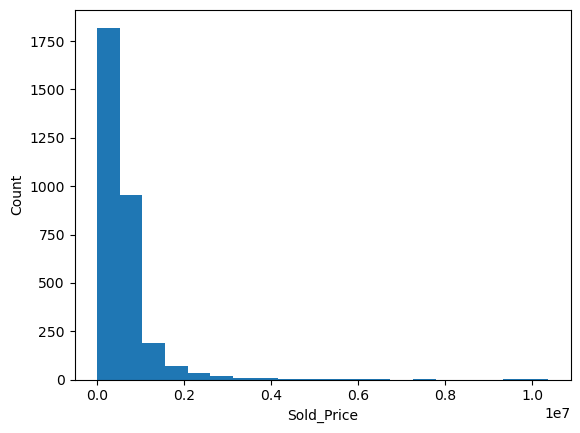

In [16]:

_ = plt.hist(df['Sold_Price'], bins=20)
_ = plt.xlabel('Sold_Price')
_=plt.ylabel('Count')
plt.show()

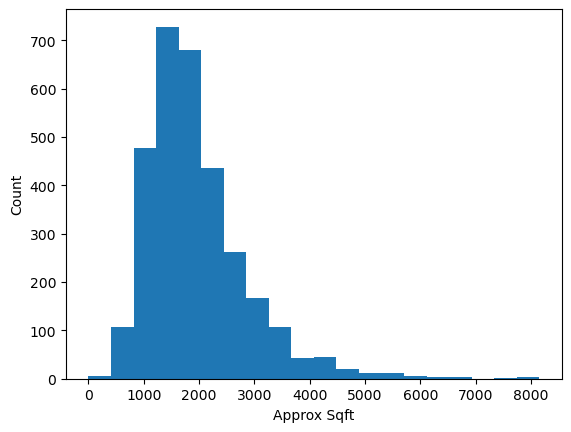

In [17]:
_ = plt.hist(df['Approx_SQFT'], bins=20)
_ = plt.xlabel('Approx Sqft')
_=plt.ylabel('Count')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3117 entries, 0 to 3116
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          3117 non-null   int64  
 1   Zip_Code            3117 non-null   object 
 2   Dwelling_Type       3117 non-null   object 
 3   Nr_Bedrooms         3117 non-null   int64  
 4   Nr_Bathrooms        3117 non-null   float64
 5   Approx_SQFT         3117 non-null   int64  
 6   Price_per_SqFt      3117 non-null   float64
 7   Dwelling_Styles     3117 non-null   object 
 8   Year_Built          3117 non-null   int64  
 9   Approx_Lot_SqFt     3117 non-null   int64  
 10  Pool                3117 non-null   object 
 11  HOA_Fee             2200 non-null   float64
 12  Land_Lease_Fee      3117 non-null   object 
 13  Clubhouse_Rec_Room  3117 non-null   object 
 14  Basement            3117 non-null   object 
 15  RV_Gate             3117 non-null   object 
 16  List_P

In [19]:
df[df['Zip_Code'] == '85202'].transpose()

,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
Unnamed: 0,1344,1345,1346,1347,1348,1349,1350,1351,1352,1353,...,1375,1376,1377,1378,1379,1380,1381,1382,1383,1384
Zip_Code,85202,85202,85202,85202,85202,85202,85202,85202,85202,85202,...,85202,85202,85202,85202,85202,85202,85202,85202,85202,85202
Dwelling_Type,AF,TH,TH,SF,MM,SF,SF,SF,SF,SF,...,SF,TH,TH,SF,SF,SF,AF,TH,SF,SF
Nr_Bedrooms,2,3,3,4,2,4,4,4,3,3,...,3,3,3,4,3,4,2,3,3,3
Nr_Bathrooms,2.0,1.0,2.0,2.0,2.0,2.5,3.0,2.0,2.0,2.0,...,2.0,1.5,1.5,2.0,2.0,2.5,2.0,2.0,2.0,2.0
Approx_SQFT,1198,988,1400,1811,1456,2459,2877,1597,2056,1365,...,2758,1320,987,2072,1430,1484,1000,1289,1288,1136
Price_per_SqFt,260.43,271.26,246.43,240.19,77.61,270.44,260.69,281.78,257.78,287.91,...,253.8,219.7,283.69,262.78,332.17,276.28,240.0,250.97,326.08,299.3
Dwelling_Styles,Attached,Attached,Attached,Detached,Detached,Detached,Detached,Detached,Detached,Detached,...,Detached,Attached,Attached,Detached,Detached,Detached,Attached,Attached,Detached,Detached
Year_Built,1983,1972,2001,1978,1993,1979,1983,1977,1979,1971,...,1963,1974,1972,1978,1978,1978,1988,1974,1979,1975
Approx_Lot_SqFt,77,932,1560,9874,0,9635,9152,7305,5694,6896,...,31128,1603,932,9415,7706,6656,1005,1111,6839,7457


In [20]:
# filter df for rows where Sold_Price is between $400,000 and $600,000 and groupby zipcode

df[(df.Sold_Price < 600000) & (df.Sold_Price > 400000)].groupby('Zip_Code')['Sold_Price'].value_counts()

Zip_Code  Sold_Price
85003     475000        1
85004     575000        2
          557000        2
          505000        2
85006     410000        1
                       ..
85396     421903        1
          418999        1
          416000        1
          408000        1
          412000        1
Name: count, Length: 866, dtype: int64

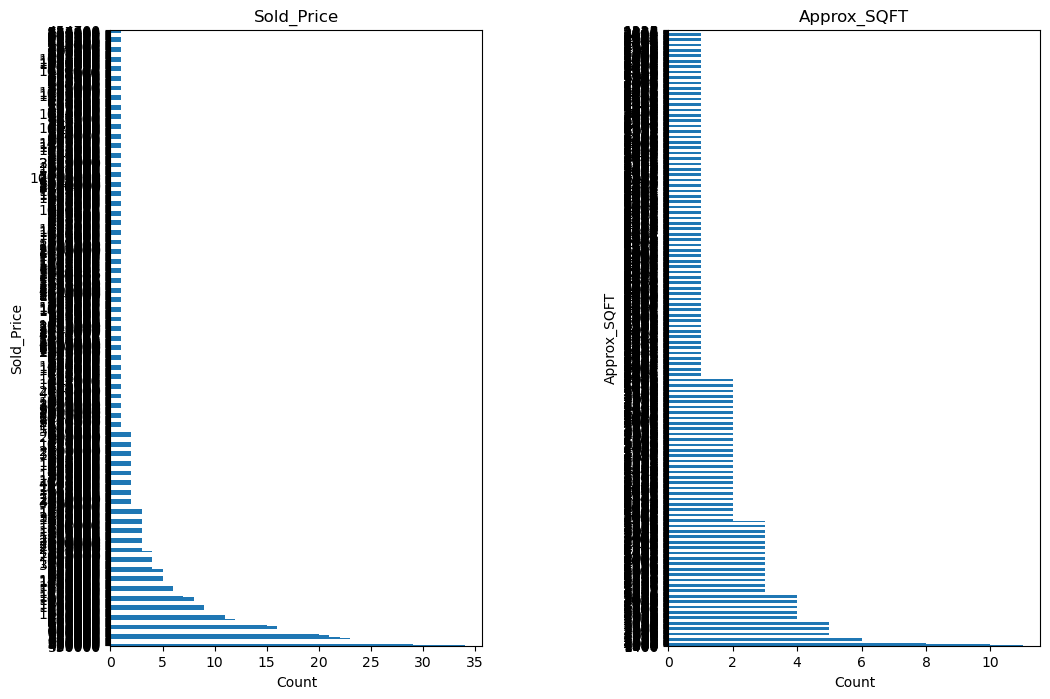

In [21]:

#Create two subplots on 1 row and 2 columns with a figsize of (12, 8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Sold_Price.value_counts().plot(kind='barh', ax=ax[0])
#Give the plot a helpful title of 'Sold_Price'
ax[0].set_title('Sold_Price')
#Label the xaxis 'Dollars'
ax[0].set_xlabel('Count')
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
df.Approx_SQFT.value_counts().plot(kind='barh', ax=ax[1])
#Give the plot a helpful title of 'Approx_SQFT'
ax[1].set_title('Approx_SQFT')
#Label the xaxis 'Sqft'
ax[1].set_xlabel('Count')
#Give the subplots a little "breathing room" with a wspace of 0.5
plt.subplots_adjust(wspace=0.5);


In [22]:
# Calculate average Sold_Price and Approx_SQFT by zipcode and sort by the average of the two

zipcode_price_means = df.groupby('Zip_Code')[['Sold_Price', 'Approx_SQFT']].mean()
zipcode_price_means

,Sold_Price,Approx_SQFT
Zip_Code,,
85003,575833.333333,1333.833333
85004,545666.666667,1514.333333
85006,464755.555556,1344.777778
85007,848600.000000,2126.600000
85008,388708.695652,1339.869565
...,...,...
85378,226214.285714,1086.071429
85379,456703.173077,2046.250000
85395,545714.285714,2195.285714


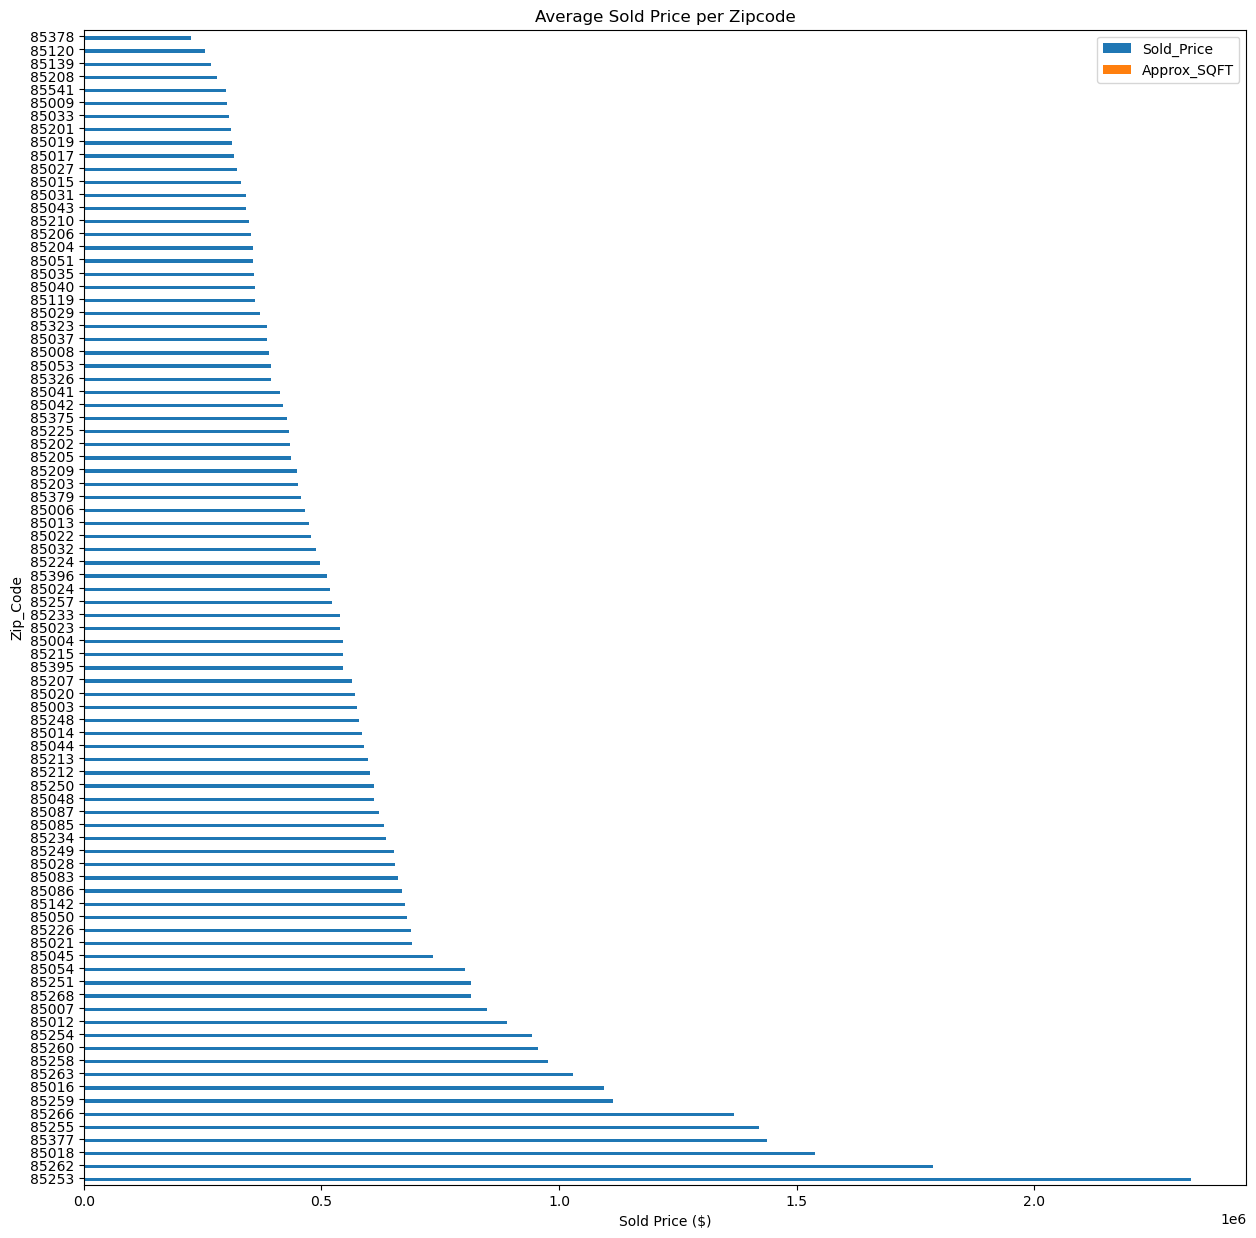

In [23]:
(zipcode_price_means.reindex(index=zipcode_price_means.mean(axis=1)
                          .sort_values(ascending=False)
                          .index)
                          .plot(kind='barh', figsize=(15, 15), title='Average Sold Price per Zipcode'))
plt.xlabel('Sold Price ($)');

In [27]:
zipcode_price_means

,Sold_Price,Approx_SQFT
Zip_Code,,
85003,575833.333333,1333.833333
85004,545666.666667,1514.333333
85006,464755.555556,1344.777778
85007,848600.000000,2126.600000
85008,388708.695652,1339.869565
...,...,...
85378,226214.285714,1086.071429
85379,456703.173077,2046.250000
85395,545714.285714,2195.285714


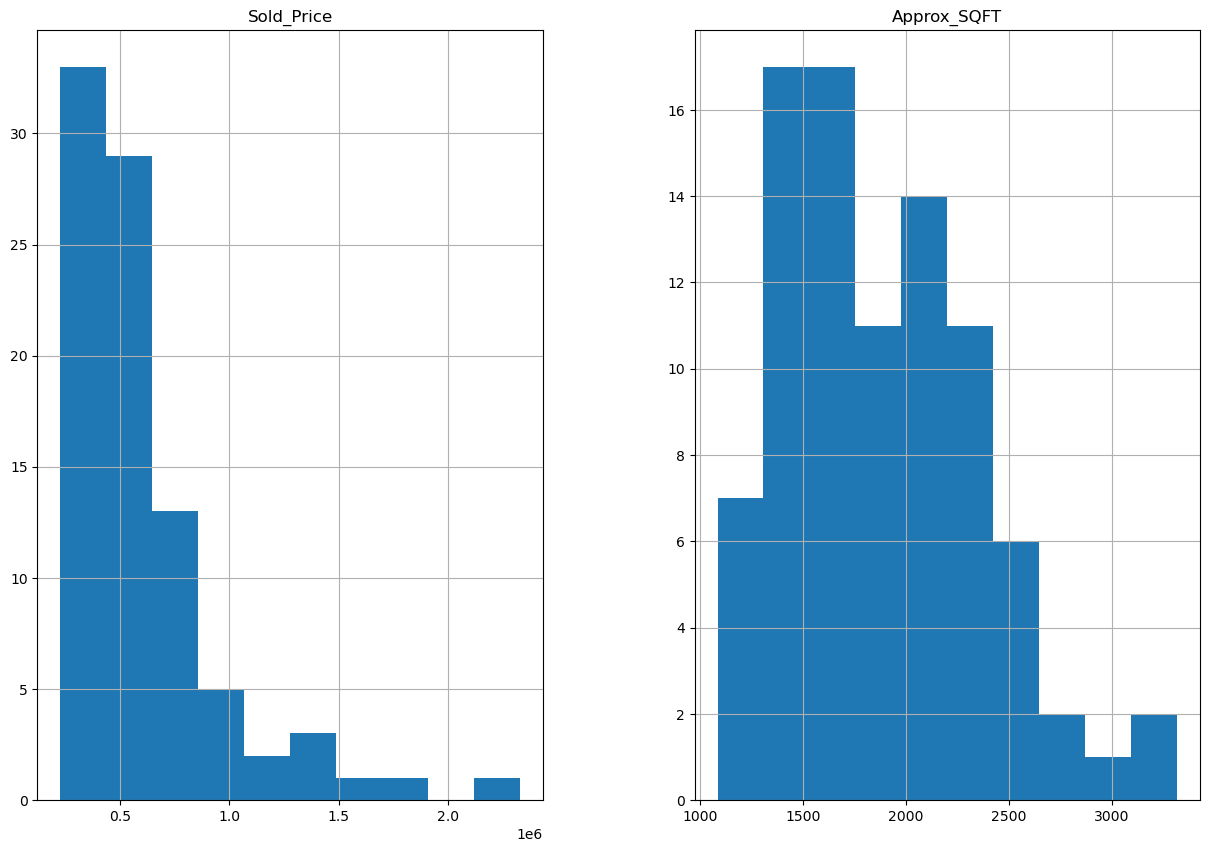

In [28]:
zipcode_price_means.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

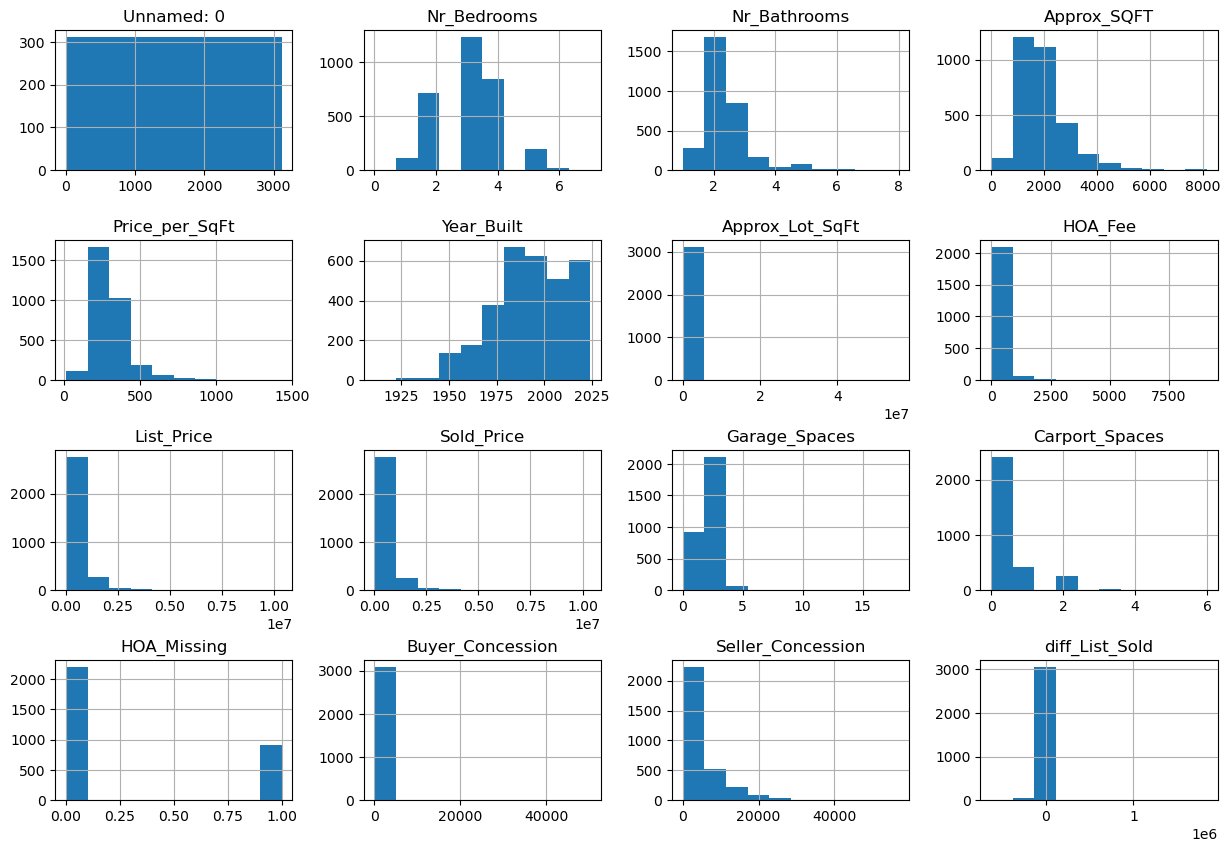

In [29]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [30]:
zipcode_price_means.index

Index(['85003', '85004', '85006', '85007', '85008', '85009', '85012', '85013',
       '85014', '85015', '85016', '85017', '85018', '85019', '85020', '85021',
       '85022', '85023', '85024', '85027', '85028', '85029', '85031', '85032',
       '85033', '85035', '85037', '85040', '85041', '85042', '85043', '85044',
       '85045', '85048', '85050', '85051', '85053', '85054', '85083', '85085',
       '85086', '85087', '85119', '85120', '85139', '85142', '85201', '85202',
       '85203', '85204', '85205', '85206', '85207', '85208', '85209', '85210',
       '85212', '85213', '85215', '85224', '85225', '85226', '85233', '85234',
       '85248', '85249', '85250', '85251', '85253', '85254', '85255', '85257',
       '85258', '85259', '85260', '85262', '85263', '85266', '85268', '85323',
       '85326', '85375', '85377', '85378', '85379', '85395', '85396', '85541'],
      dtype='object', name='Zip_Code')

**Explore the Data**

In [32]:
df.head()

,Unnamed: 0,Zip_Code,Dwelling_Type,Nr_Bedrooms,Nr_Bathrooms,Approx_SQFT,Price_per_SqFt,Dwelling_Styles,Year_Built,Approx_Lot_SqFt,...,Gated_Community,Workout_Facility,Garage_Spaces,Carport_Spaces,Loan_Type,Payment_Type,HOA_Missing,Buyer_Concession,Seller_Concession,diff_List_Sold
0,0,85003,AF,1,1.0,720,340.28,Stacked,1964,652,...,Yes,Yes,0.0,1.0,Conventional,Fixed,0,0.0,7410.00,-2000
1,1,85003,LS,1,1.0,755,430.46,Stacked,2005,751,...,Yes,Yes,0.0,0.0,VA,Fixed,0,0.0,0.00,-10000
2,2,85003,SF,4,3.0,3415,439.23,Detached,1940,11696,...,Yes,Yes,2.0,0.0,Conventional,Fixed,0,0.0,0.00,-95000
3,3,85003,AF,1,1.0,710,436.61,Stacked,2005,0,...,Yes,Yes,0.0,0.0,Conventional,Adjustable,0,0.0,6000.00,-5000
4,4,85003,AF,2,2.5,1510,314.56,Stacked,2007,654,...,No,Yes,2.0,0.0,Conventional,Fixed,0,0.0,17621.25,5100


In [38]:
# Total square footage in Maricopa County
total_sqft = df['Approx_SQFT'].sum()
total_sqft

6074474

In [40]:
# total number of real estate properties
nr = len(df)
nr

3117

In [42]:
# mean sqft per house in Maricopa County
m_p_sqft = total_sqft/nr
m_p_sqft

1948.820660891883